In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/country-data.csv'
paises = pd.read_csv(url)
paises.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [3]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
paises.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Selecionar as colunas child_mort (mortalidade infantil) e life_expec (expectativa de vida)
#      para poder ver os dados em um espaço bidimensional.

paises_2d = paises[['child_mort','life_expec']]

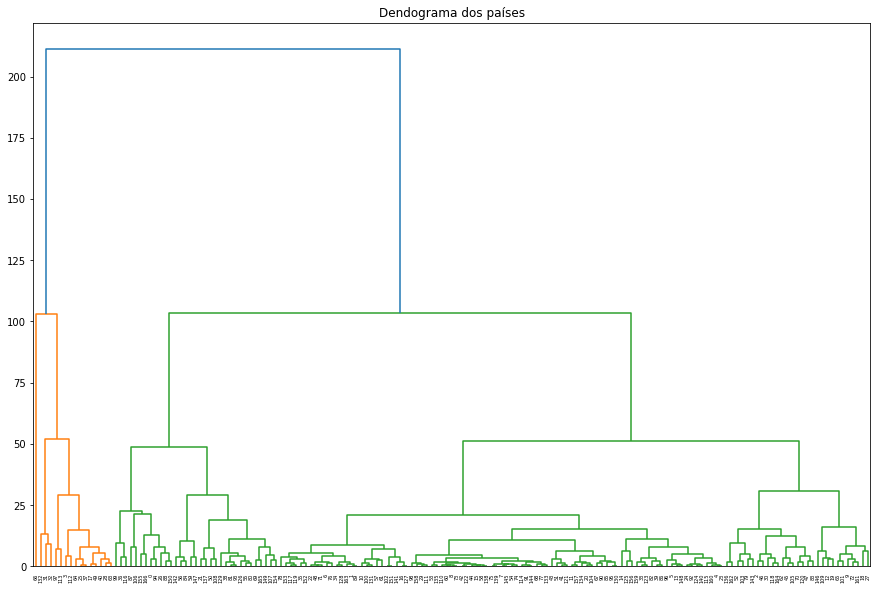

In [6]:
# Visualizar o dendograma com o complete-linkage, para indicar o número de grupos da base de dados.

plt.figure(figsize=(15, 10))
plt.title("Dendograma dos países")
dendograma = shc.dendrogram(shc.linkage(paises_2d, method='complete'))

In [11]:
# Usar 4 grupos, o complete linkage e a distância euclidiana

grupos = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
grupos.fit_predict(paises_2d)

array([2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2], dtype=int64)

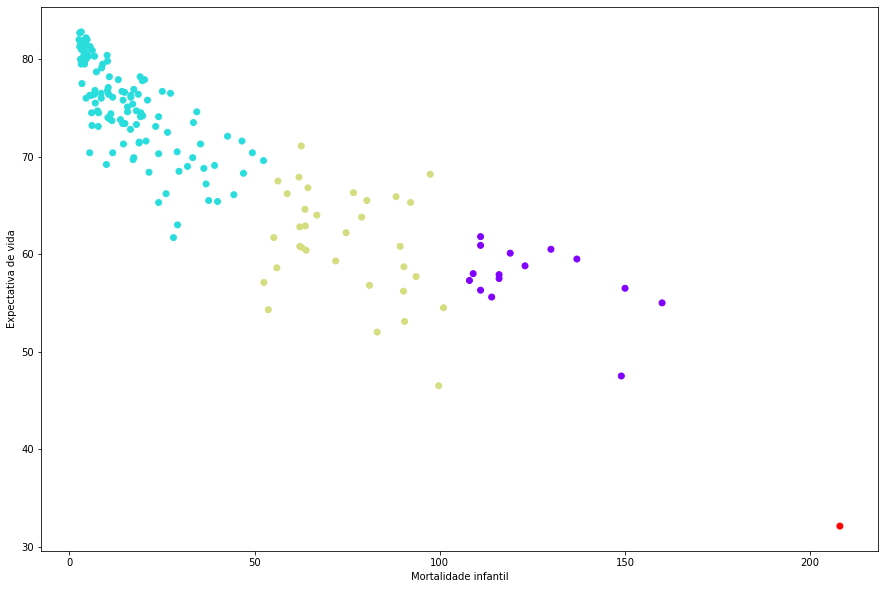

In [12]:
# Gráfico de dispersão e pintando os objetos dos grupos com cores diferentes.

plt.scatter(paises_2d['child_mort'],paises_2d['life_expec'],c=grupos.labels_,cmap='rainbow')
plt.xlabel('Mortalidade infantil')
plt.ylabel('Expectativa de vida')
plt.show()

In [16]:
# Pior taxa de mortalidade

paises['country'][paises['child_mort'] > 200]

66    Haiti
Name: country, dtype: object

In [17]:
# Pior expectativa de vida

paises['country'][paises['life_expec'] < 35]

66    Haiti
Name: country, dtype: object

In [19]:
# Melhor taxa de mortalidade

paises['country'][paises['child_mort'] < 3]

68        Iceland
91     Luxembourg
133     Singapore
Name: country, dtype: object

In [20]:
# Melhor expectativa de vida

paises['country'][paises['life_expec'] > 82]

77           Japan
133      Singapore
145    Switzerland
Name: country, dtype: object

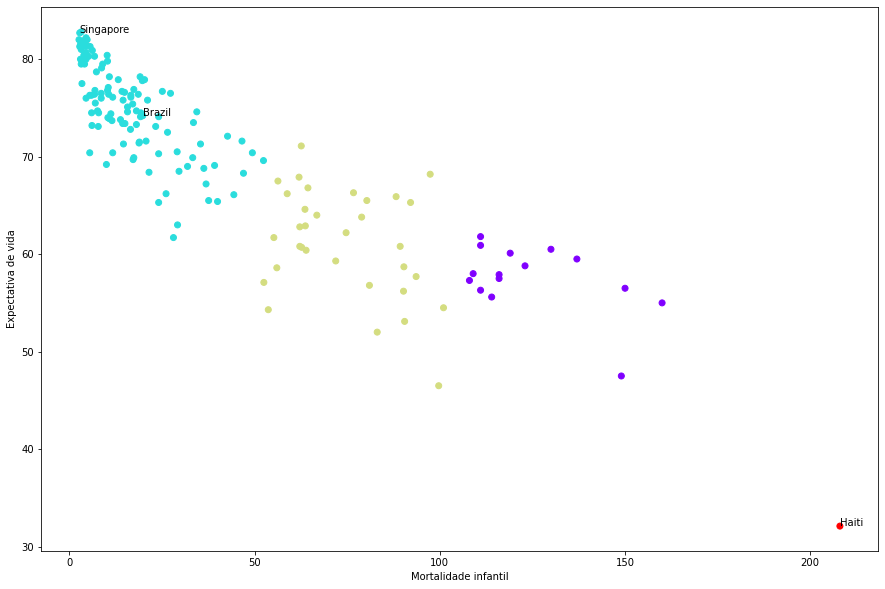

In [21]:
# Adicionar rótulos a alguns pontos do gráfico.
# Ver onde o está o Brasil.

fig, eixo = plt.subplots()

eixo.scatter(paises_2d['child_mort'],paises_2d['life_expec'],c=grupos.labels_,cmap='rainbow')
eixo.set_xlabel('Mortalidade infantil')
eixo.set_ylabel('Expectativa de vida')

# iterando sobre o dataframe original, que tem o nome dos países
for i, texto in enumerate(paises['country']):
    # só vamos adicionar rótulos nos extremos para não poluir a visualização
    if ((paises.iloc[i]['life_expec'] < 35 and paises.iloc[i]['child_mort'] > 200) 
       or (paises.iloc[i]['life_expec'] > 82 and paises.iloc[i]['child_mort'] < 3) 
       or (paises.iloc[i]['country'] == 'Brazil')):
        eixo.annotate(texto, (paises.iloc[i]['child_mort'], paises.iloc[i]['life_expec']))

plt.show()